# Voting Districts

In this notebook we will download and analyze some demographic data
at the voting district level using the Decenial Public Law 94.171 
data set.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem

from censusdis.states import NJ
from censusdis.counties.new_jersey import UNION
from censusdis.datasets import DECENNIAL_PUBLIC_LAW_94_171

import pandas as pd
from matplotlib.ticker import PercentFormatter

pd.set_option("display.max_colwidth", None)

## Locate the Variables We Want

In [2]:
ced.variables.all_groups(DECENNIAL_PUBLIC_LAW_94_171, 2020)

,DATASET,YEAR,GROUP,DESCRIPTION
0,dec/pl,2020,H1,OCCUPANCY STATUS
1,dec/pl,2020,P1,RACE
2,dec/pl,2020,P2,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE"
3,dec/pl,2020,P3,RACE FOR THE POPULATION 18 YEARS AND OVER
4,dec/pl,2020,P4,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE FOR THE POPULATION 18 YEARS AND OVER"
5,dec/pl,2020,P5,GROUP QUARTERS POPULATION BY MAJOR GROUP QUARTERS TYPE


In [3]:
ced.variables.all_variables(DECENNIAL_PUBLIC_LAW_94_171, 2020, "P4").head(10)

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,dec/pl,P4,P4_001N,!!Total:,NaN,None
1,2020,dec/pl,P4,P4_002N,!!Total:!!Hispanic or Latino,NaN,None
2,2020,dec/pl,P4,P4_003N,!!Total:!!Not Hispanic or Latino:,NaN,None
3,2020,dec/pl,P4,P4_004N,!!Total:!!Not Hispanic or Latino:!!Population of one race:,NaN,None
4,2020,dec/pl,P4,P4_005N,!!Total:!!Not Hispanic or Latino:!!Population of one race:!!White alone,NaN,None
5,2020,dec/pl,P4,P4_006N,!!Total:!!Not Hispanic or Latino:!!Population of one race:!!Black or African American alone,NaN,None
6,2020,dec/pl,P4,P4_007N,!!Total:!!Not Hispanic or Latino:!!Population of one race:!!American Indian and Alaska Native alone,NaN,None
7,2020,dec/pl,P4,P4_008N,!!Total:!!Not Hispanic or Latino:!!Population of one race:!!Asian alone,NaN,None
8,2020,dec/pl,P4,P4_009N,!!Total:!!Not Hispanic or Latino:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,NaN,None
9,2020,dec/pl,P4,P4_010N,!!Total:!!Not Hispanic or Latino:!!Population of one race:!!Some Other Race alone,NaN,None


## Download the Data

We'll look at voting districts in Union County, NJ. We want to know the fraction
of the population of each voting district that identify as Hispanic or Latino, or 
Non-Hispanic or Latino White Alone, Black Alone or Asian Alone, so we will download variables 
`P4_001N`, `P4_002N`, `P4_005N`, `P4_006N`, and `P4_008N`.

In [4]:
gdf = ced.download(
    DECENNIAL_PUBLIC_LAW_94_171,
    2020,
    ["NAME", "P4_001N", "P4_002N", "P4_005N", "P4_006N", "P4_008N"],
    state=NJ,
    county=UNION,
    voting_district="*",
    with_geometry=True,
)

Compute the fractions we want to plot.

In [5]:
gdf["frac_hl"] = gdf["P4_002N"] / gdf["P4_001N"]
gdf["frac_white"] = gdf["P4_005N"] / gdf["P4_001N"]
gdf["frac_black"] = gdf["P4_006N"] / gdf["P4_001N"]
gdf["frac_asian"] = gdf["P4_008N"] / gdf["P4_001N"]

## Plot the Maps

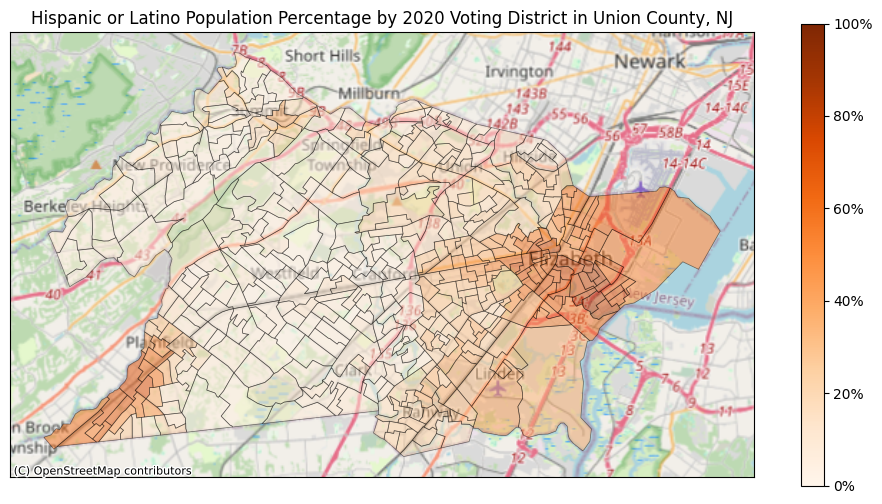

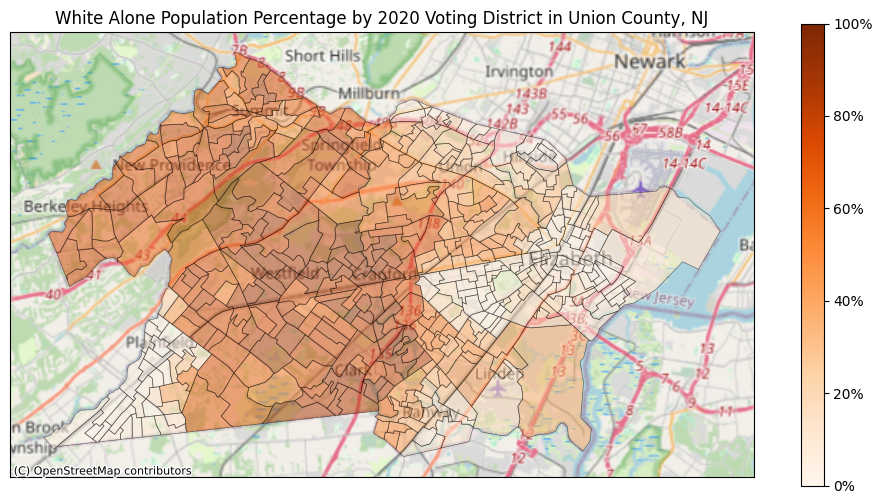

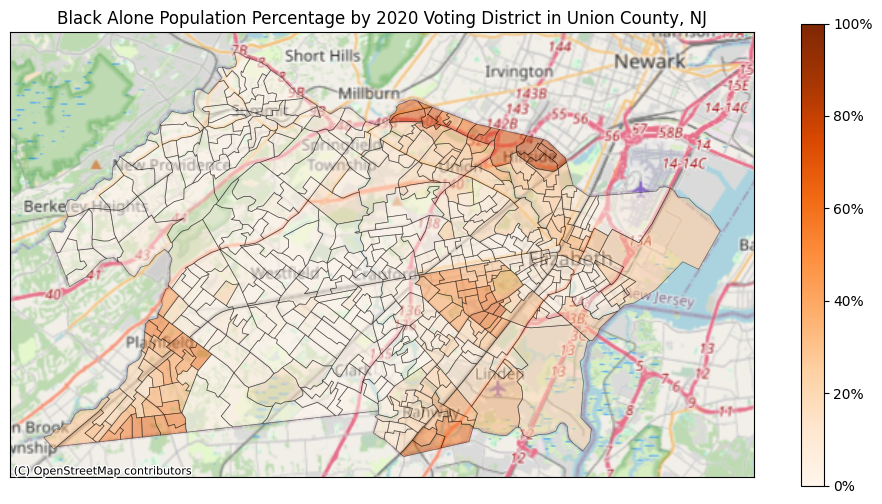

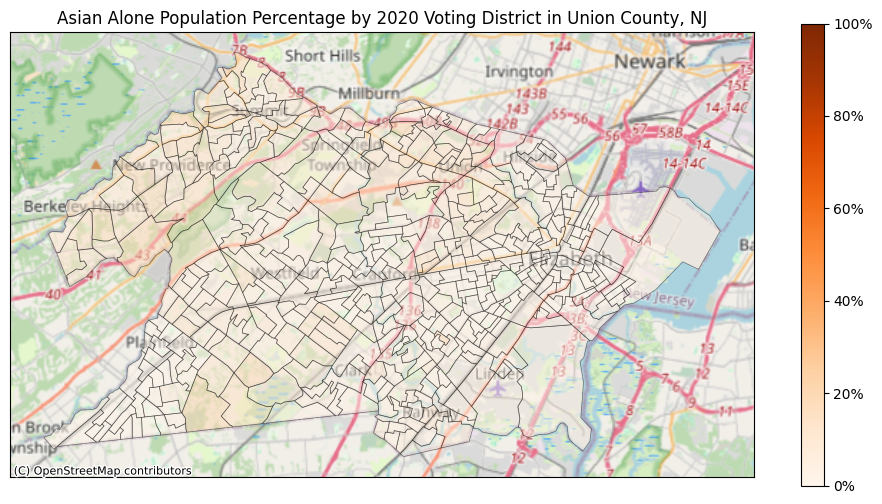

In [6]:
for var, label in [
    ("frac_hl", "Hispanic or Latino"),
    ("frac_white", "White Alone"),
    ("frac_black", "Black Alone"),
    ("frac_asian", "Asian Alone"),
]:
    ax = cem.plot_map(
        gdf,
        var,
        vmin=0.0,
        vmax=1.0,
        legend_kwds={"format": PercentFormatter(1.0)},
        cmap="Oranges",
        linewidth=0.5,
        edgecolor="black",
        alpha=0.5,
        legend=True,
        with_background=True,
        figsize=(12, 6),
    )

    ax.set_title(
        f"{label} Population Percentage by 2020 Voting District in Union County, NJ"
    )